In [13]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
from skimage import io

In [23]:
image = io.imread('shark-1.jpg')
sh = image.shape

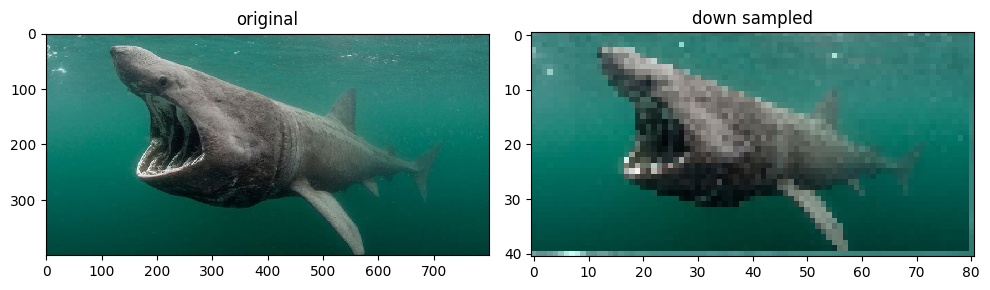

In [15]:
ds = 10 # downscale factor

rowd = int(sh[0]/ds)+1
cold = int(sh[1]/ds)+1

image_down = image.copy()[0:rowd, 0:cold]

rw = 0
cl = 0

# choose every ds row and column
for row in range(0, sh[0] , ds):
  cl = 0
  for col in range(0, sh[1], ds):
    image_down[rw][cl] = image[row][col]
    cl = cl + 1
  rw = rw + 1

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('original')
io.imshow(image)

plt.subplot(1, 2, 2)
plt.title('down sampled')
io.imshow(image_down, cmap = 'gray')

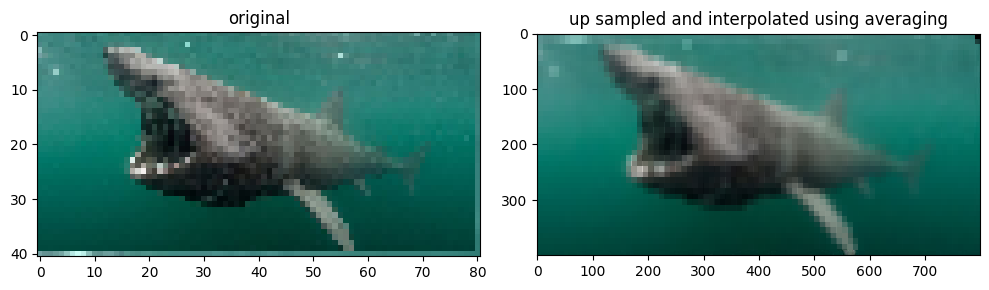

In [22]:
us = 10

image_up = image.copy()

# insert zeros in down sampled image
sh = image_down.shape
rw = 0
cl = 0

for row in (0, sh[0]-1):
  cl = 0
  for col in range(0, sh[1]-1):
    image_up[rw][cl] = image_down[row][col]
    image_up[rw, cl+1:cl+us] = 0
    cl = cl + us

  image_up[rw+1:rw+us, :] = 0
  rw = rw + us

shu = image_up.shape

# using average for interpolation
for row in range(0, shu[0], us):
  for col in range(0, shu[1]-us, us):
    temp1 = (image_up[row, col])/2
    temp2 = (image_up[row, col+us])/2
    temp = temp1 + temp2
    image_up[row, col+1:col+ds] = [int(temp[0]), int(temp[1]), int(temp[2])]

for row in range(0, shu[0]-us, us):
  for col in range(0, shu[1]):
    temp1 = (image_up[row, col])/2
    temp2 = (image_up[row+us, col])/2
    temp = temp1 + temp2
    image_up[row:row+us, col] = [int(temp[0]), int(temp[1]), int(temp[2])]

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('original')
io.imshow(image_down)

plt.subplot(1, 2, 2)
plt.title('up sampled and interpolated using averaging')
io.imshow(image_up, cmap = 'gray')